In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 4.0MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [5]:
import pandas as pd
import numpy as np
import gc
np.random.seed(0)

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import re

# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import learning_curve, train_test_split
# from sklearn.model_selection import KFold

# import xgboost as xgb
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

# import xgbfir
%matplotlib inline

In [53]:
train = pd.read_hdf('/content/drive/MyDrive/ML/PML8_course/input/train.v4.h5')
test = pd.read_hdf('/content/drive/MyDrive/ML/PML8_course/input/test.v4.h5') # test set without price

df_all = pd.concat([train, test], sort=False)

pd.set_option('display.max_columns',35)
pd.set_option('display.max_rows',50)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45694 entries, 0 to 45693
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   breadcrumbs                 45694 non-null  object 
 1   date                        45694 non-null  object 
 2   geo_block                   45694 non-null  object 
 3   owner                       45694 non-null  object 
 4   price                       45694 non-null  float64
 5   Security:                   26186 non-null  object 
 6   Building type:              45520 non-null  object 
 7   Object type:                45686 non-null  object 
 8   Ad type:                    45686 non-null  object 
 9   Commission agent:           45371 non-null  object 
 10  Construction phase:         35768 non-null  object 
 11  Housing class:              35768 non-null  object 
 12  Elevator:                   26821 non-null  object 
 13  Bathroom type:              123

In [ ]:
train.head()

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
0,"[Москва, МЦК Лужники]","[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",[],380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,Commissioned,Elite class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",[],8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Москва, МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",[],6.520000,provided,Monolithic,apartments,from the developer,no fee,Finish,Comfort class,yes,combined,NaN,NaN,yard,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Москва, Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",[],20.269686,NaN,Monolithic,flat,new building,no fee,NaN,NaN,yes,NaN,loggia,yes,street,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Москва, Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",[],15.100880,NaN,Monolithic,apartments,secondary,no fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

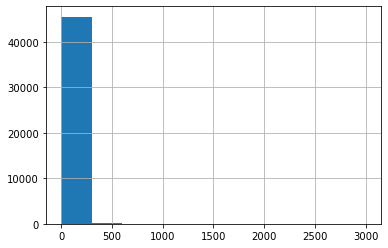

In [ ]:
train['price'].hist()

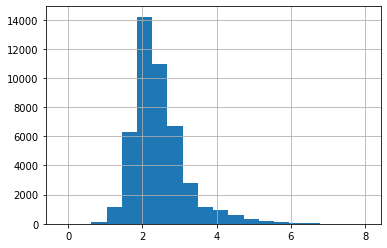

In [54]:
train['price_log'] = np.log(train['price'])
train['price_log'].hist(bins=20);

In [ ]:
train.isna().sum()

breadcrumbs                       0
date                              0
geo_block                         0
owner                             0
price                             0
Security:                     19508
Building type:                  174
Object type:                      8
Ad type:                          8
Commission agent:               323
Construction phase:            9926
Housing class:                 9926
Elevator:                     18873
Bathroom type:                33359
Balcony type:                 34463
Mortgage possible:            26593
The view from the window:     30936
Garbage chute:                26379
Repair:                       39586
Fridge:                       45370
Phone:                        45014
Furniture:                    45368
Free layout:                  44823
It is possible to bargain:    45386
Floor covering:               45156
Room type:                    44999
Internet:                     44855
Kitchen furniture:          

In [ ]:
test.isna().sum()

breadcrumbs                       0
date                              0
geo_block                         0
owner                             0
Security:                      9737
Building type:                   81
Object type:                      4
Ad type:                          4
Commission agent:               162
Construction phase:            4953
Housing class:                 4953
Elevator:                      9452
Bathroom type:                16579
Balcony type:                 17162
Mortgage possible:            13231
The view from the window:     15280
Garbage chute:                13048
Repair:                       19653
Fridge:                       22498
Phone:                        22276
Furniture:                    22471
Free layout:                  22243
It is possible to bargain:    22505
Floor covering:               22357
Room type:                    22319
Internet:                     22238
Kitchen furniture:            22550
TV:                         

In [ ]:
train.describe(include=['bool', 'object'])

,breadcrumbs,date,geo_block,owner,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
count,45694,45694,45694,45694,26186,45520,45686,45686,45371,35768,35768,26821,12335,11231,19101,14758,19315,6108,324,680,326,871,308,538,695,839,216,155,91,303,351,354,196,80
unique,1712,13431,1116,265,109,9,4,3,1,7,4,1,3,5,1,2,1,6,1,1,1,1,1,4,3,1,1,1,1,6,4,2,1,1
top,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[16 мая, 2, (+1 за сегодня)]","[г. Москва, г. Москва]",[],provided,Monolithic,apartments,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,street,yes,euro,yes,yes,yes,yes,yes,laminate,separate,yes,yes,yes,yes,Ribbon,Reinforced Concrete,Apartment building,yes,elite real estate
freq,1574,732,12243,41028,17188,32000,24698,21340,45371,13760,18592,26821,6384,6063,19101,7465,19315,5696,324,680,326,871,308,348,603,839,216,155,91,180,339,347,196,80


In [ ]:
df_all.describe(include=['bool', 'object'])

,breadcrumbs,date,geo_block,owner,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
count,68361,68361,68361,68361,39116,68106,68349,68349,67876,53482,53482,40036,18423,16736,28537,22145,28934,9122,493,1071,522,1295,470,848,1043,1268,333,252,140,488,561,567,320,127
unique,2115,17452,1399,316,121,9,4,3,1,7,4,1,3,5,1,2,1,6,1,1,1,1,1,4,3,1,1,1,1,6,4,3,1,1
top,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[16 мая, 2, (+1 за сегодня)]","[г. Москва, г. Москва]",[],provided,Monolithic,apartments,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,street,yes,euro,yes,yes,yes,yes,yes,laminate,separate,yes,yes,yes,yes,Ribbon,Reinforced Concrete,Apartment building,yes,elite real estate
freq,2353,1070,18353,61374,25703,47738,36975,31965,67876,20603,27835,40036,9498,9058,28537,11240,28934,8513,493,1071,522,1295,470,533,908,1268,333,252,140,283,542,551,320,127


In [34]:
train.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95])

,price,price_log
count,45694.000000,45694.000000
mean,17.422577,2.436431
std,38.332439,0.723210
min,0.820018,-0.198429
25%,7.173917,1.970452
50%,9.910000,2.293544
75%,15.405717,2.734739
85%,20.700000,3.030134
90%,26.500000,3.277145
95%,48.000000,3.871201


In [8]:
train.fillna('nan', inplace=True)

In [20]:
med = np.median(train['price_log'])
med_up = med + np.std(train['price_log'])
med_down = med - np.std(train['price_log'])
reference = [med_down, med, med_up]

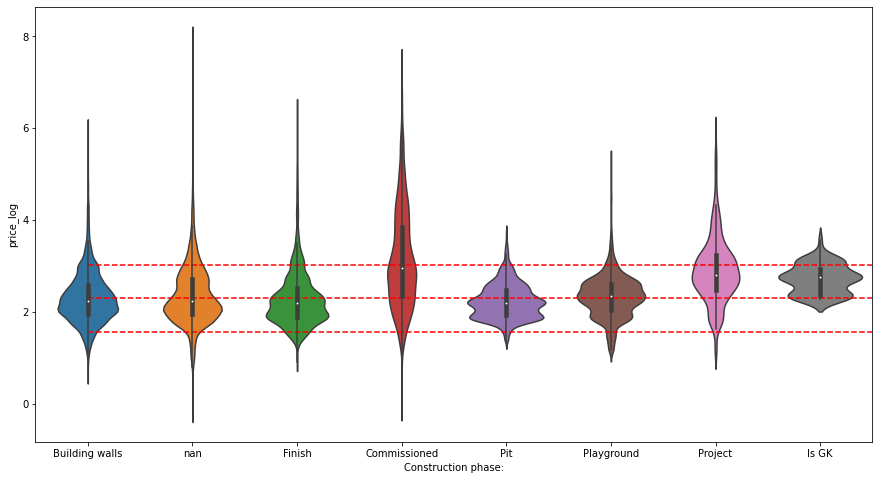

In [25]:
plt.figure(figsize=(15,8))
column = 'Construction phase:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

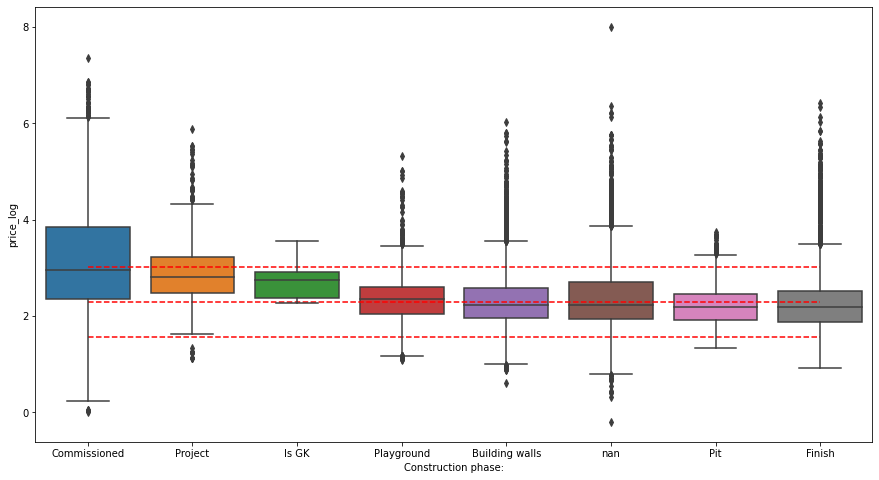

In [28]:
plt.figure(figsize=(15,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

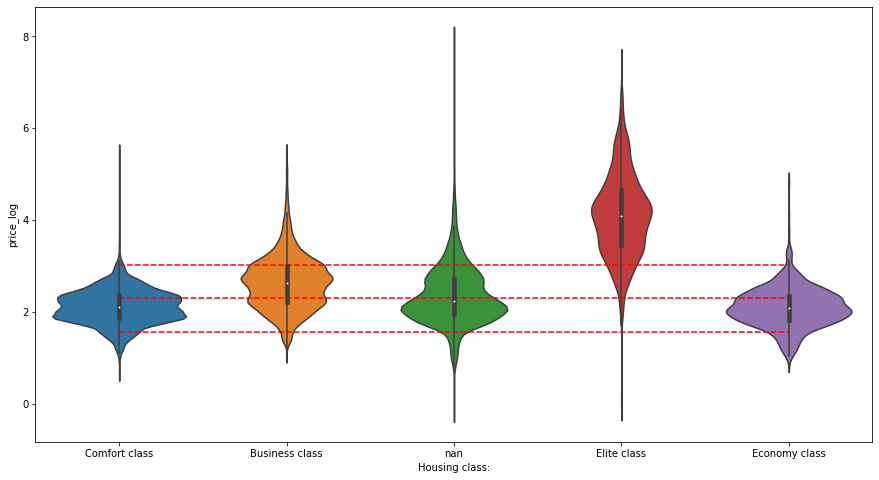

In [29]:
plt.figure(figsize=(15,8))
column = 'Housing class:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

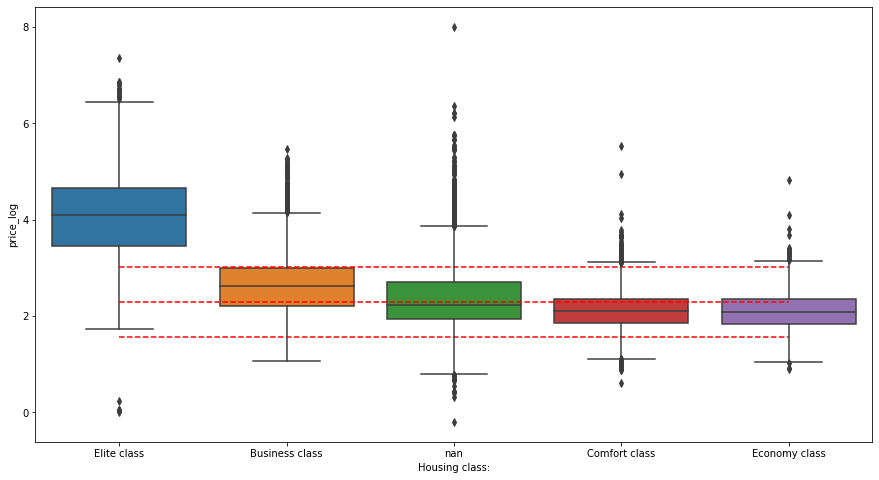

In [30]:
plt.figure(figsize=(15,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

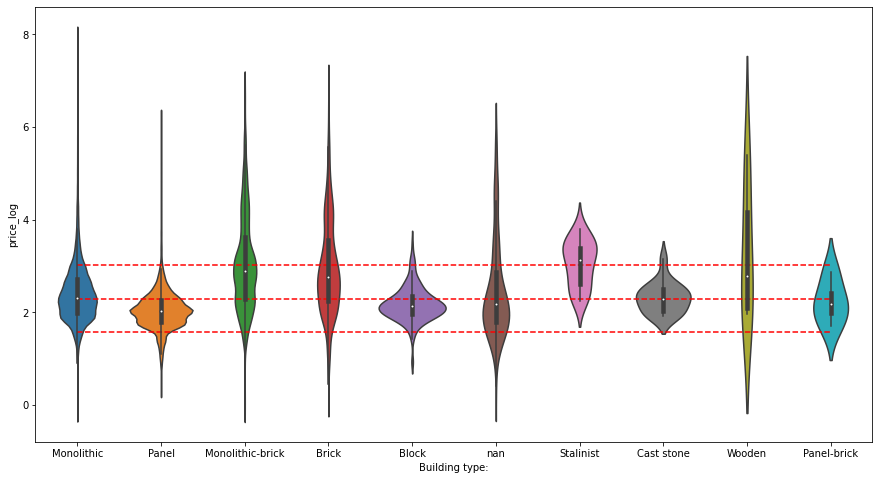

In [31]:
plt.figure(figsize=(15,8))
column = 'Building type:'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

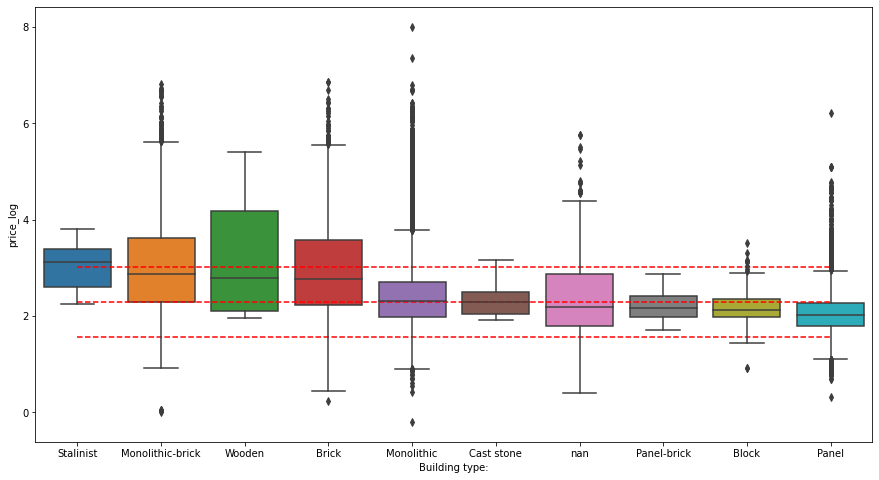

In [32]:
plt.figure(figsize=(15,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

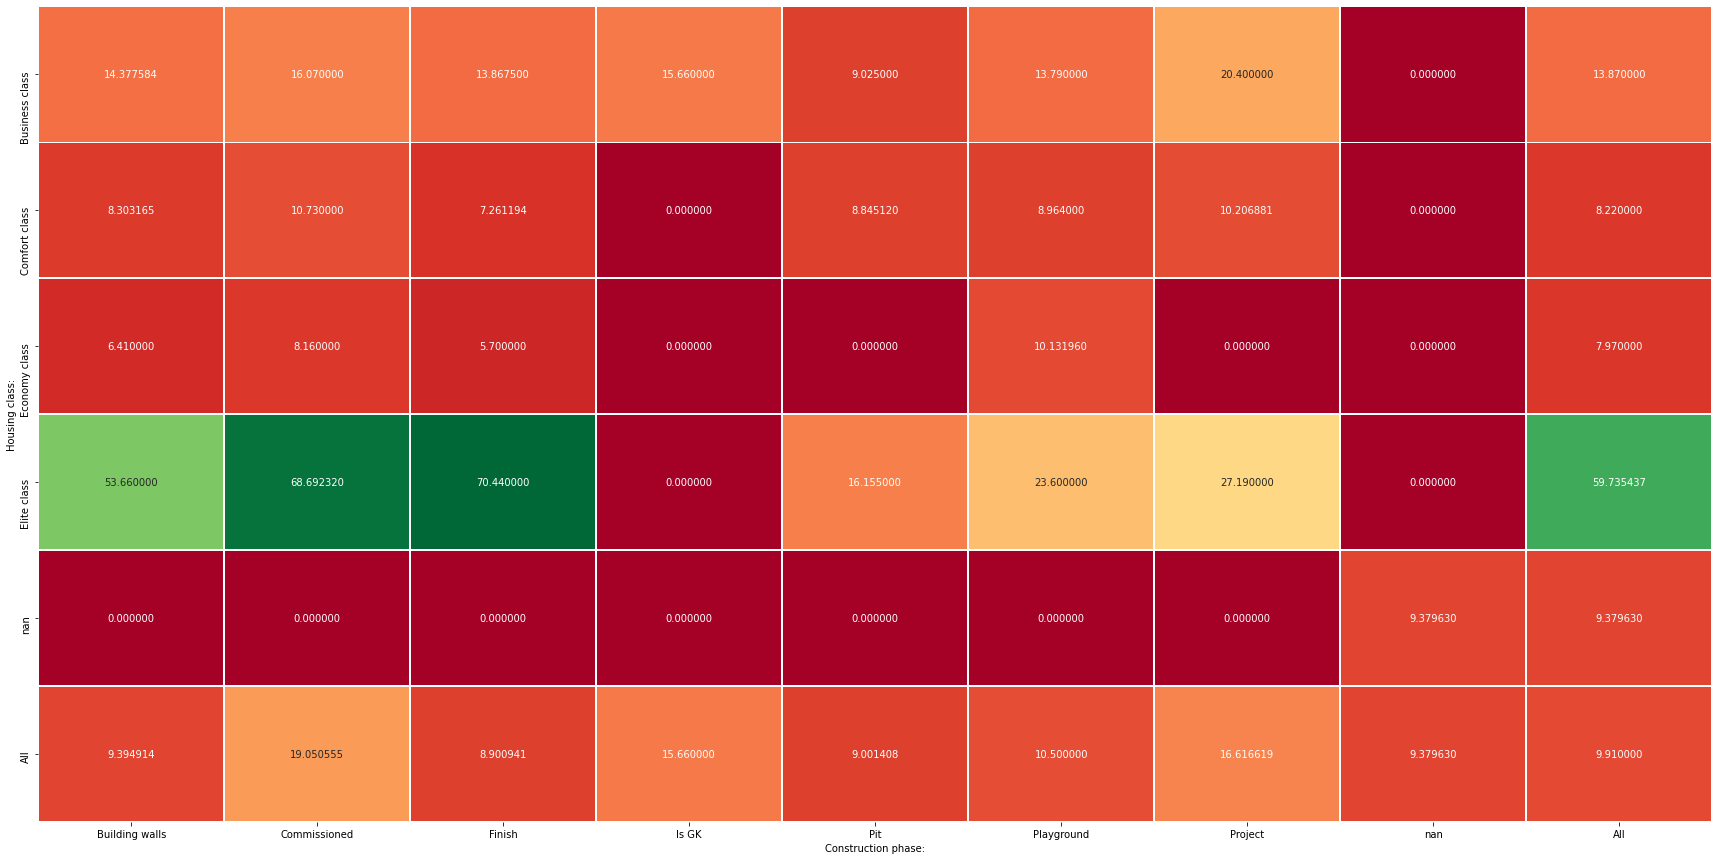

In [ ]:
pt= train.pivot_table(values='price', index='Housing class:',columns='Construction phase:', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(30,15)
sns.heatmap(pt, annot=True, fmt="f", cmap="RdYlGn", cbar=False, linewidths=.5);

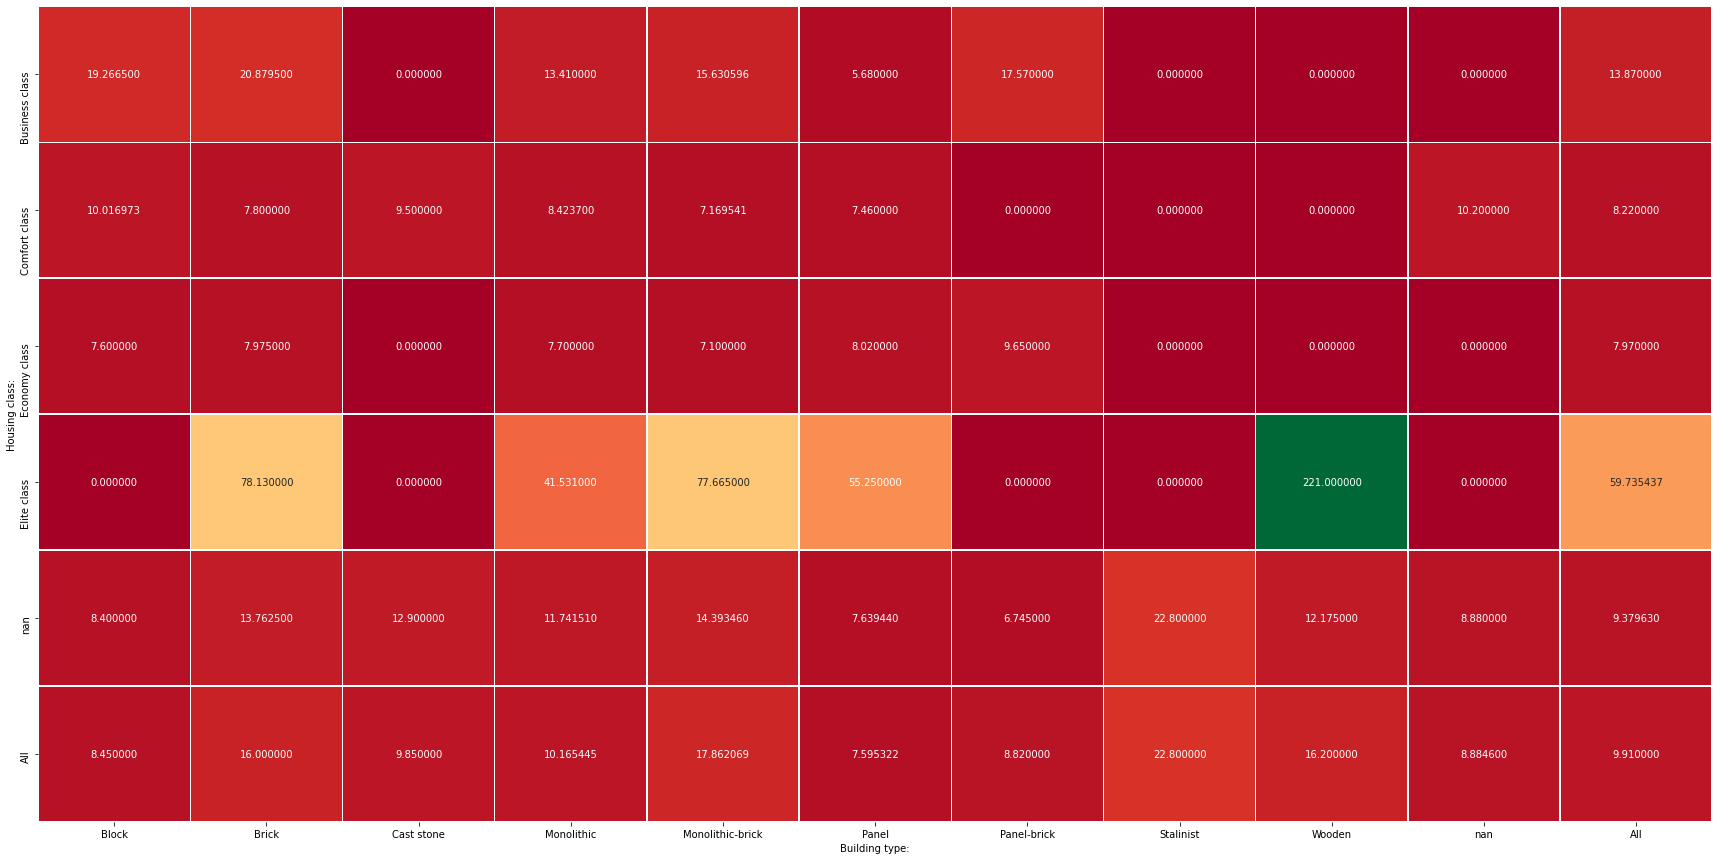

In [ ]:
pt= train.pivot_table(values='price', index='Housing class:',columns='Building type:', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(30,15)
sns.heatmap(pt, annot=True, fmt="f", cmap="RdYlGn", cbar=False, linewidths=.5);

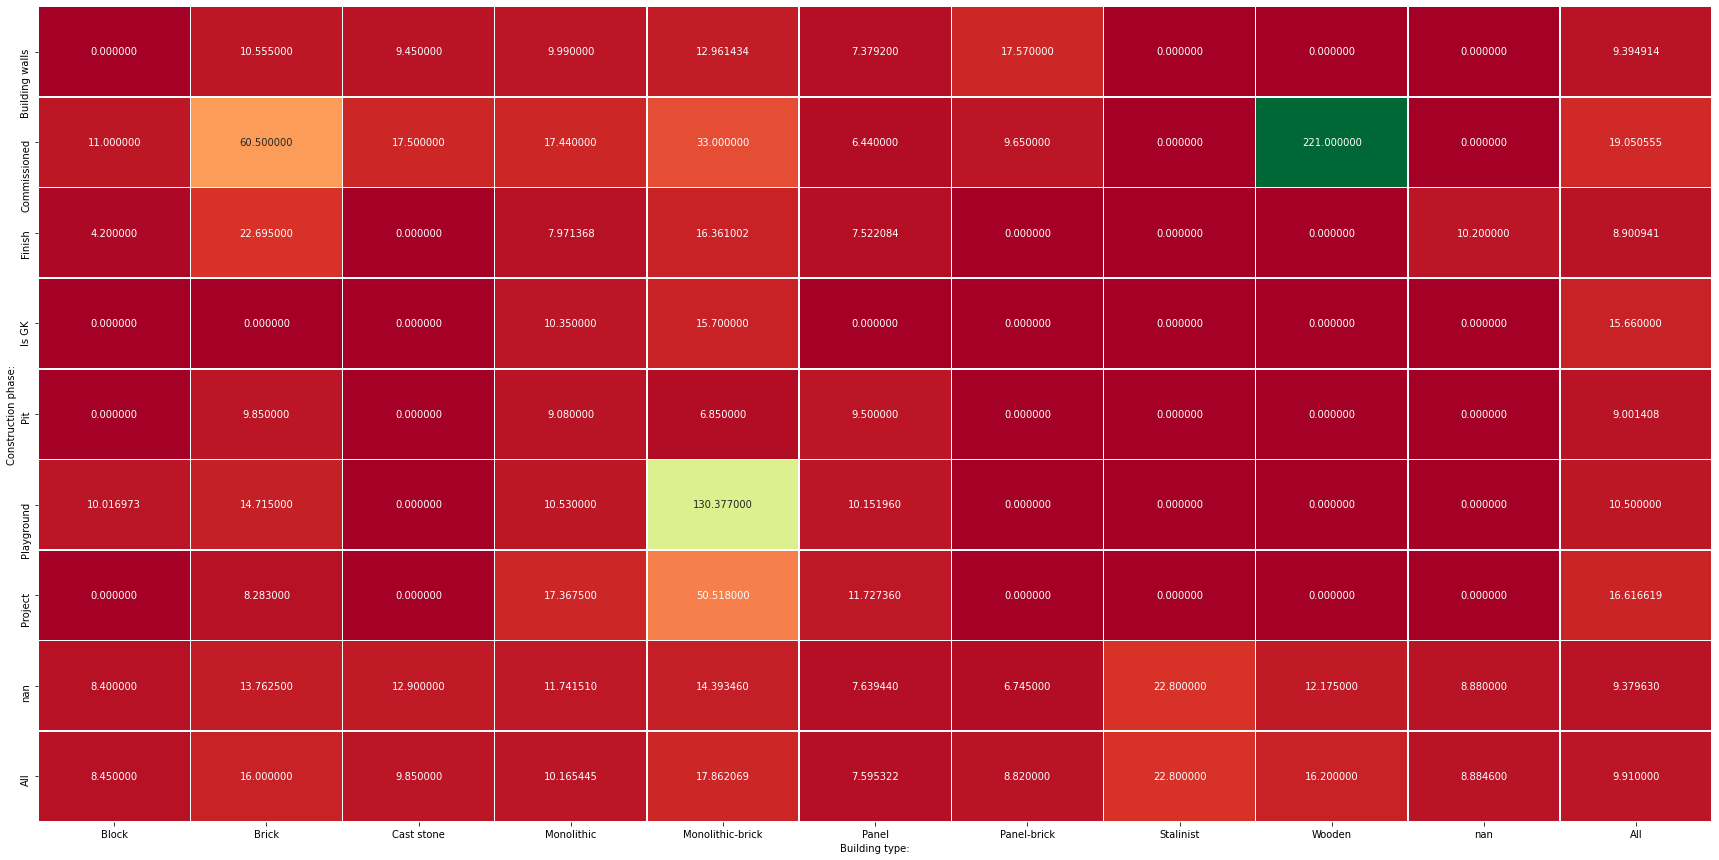

In [ ]:
pt= train.pivot_table(values='price', index='Construction phase:',columns='Building type:', aggfunc=np.median, fill_value=0, margins=True)
plt.rcParams['figure.figsize']=(30,15)
sns.heatmap(pt, annot=True, fmt="f", cmap="RdYlGn", cbar=False, linewidths=.5);

In [36]:
col = ['Building type:', 'Construction phase:', 'Housing class:']
subset = train['Housing class:']!='Elite class'
train.groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

Building type: Construction phase:  Housing class:      price  \
                                                               amin   
87            Wooden        Commissioned     Elite class  221.00000   
62  Monolithic-brick          Playground     Elite class   87.52000   
58  Monolithic-brick              Finish     Elite class   12.08000   
54  Monolithic-brick        Commissioned     Elite class    1.01000   
11             Brick        Commissioned     Elite class    1.26000   
..               ...                 ...             ...        ...   
75             Panel              Finish   Economy class    2.90000   
69             Panel        Commissioned  Business class    3.50000   
34        Monolithic              Finish   Economy class    3.24597   
2              Block              Finish   Economy class    4.20000   
57  Monolithic-brick              Finish   Economy class    2.50000   

                                            
          mean    median        amax count  
87  221.000000  221.0000  221.000000     1  
62  119.969400  130.3770  150.920000     5  
58  107.512863   89.1340  617.460000   155  
54  127.391281   84.2080  915.800000   681  
11  124.630429   78.5605  959.170000   258  
..         ...       ...         ...   ...  
75    5.954935    6.0000   10.450000    77  
69    8.776725    5.5000  103.474125   243  
34    5.349686    4.4000   11.950000    16  
2     4.200000    4.2000    4.200000     1  
57    2.500000    2.5000    2.500000     1  

[91 rows x 8 columns]

In [55]:
def bread_geo_func(row): #concatenate breadcrumbs with geo_block, erase repeated values
    bread_str = ','.join(row['breadcrumbs']).lower().strip()
    geo_str = ','.join(row['geo_block']).lower().strip()
    bread_geo_str = (bread_str +','+ geo_str).replace('.', '')
    # .replace('ул.', 'ул').replace('пер.', 'пер').replace('пр-кт.', 'пр-кт').\
    #             replace('проезд.', 'проезд').replace('б-р.', 'б-р')
    
    bread_geo = ','.join(sorted(list(set(bread_geo_str.split(',')) - set(['москва', 'г москва']))))
    
    return bread_geo

train['bread_geo_str'] = train[['breadcrumbs', 'geo_block']].apply(bread_geo_func, axis=1)

def metro_func(row):
    metro = [i for i in row['bread_geo_str'].split(',') if ('мцк ' in i)]
    if len(metro)>0 :
        return ','.join(metro)
    return 'missing'
train['metro_str'] = train[['bread_geo_str']].apply(metro_func, axis=1)

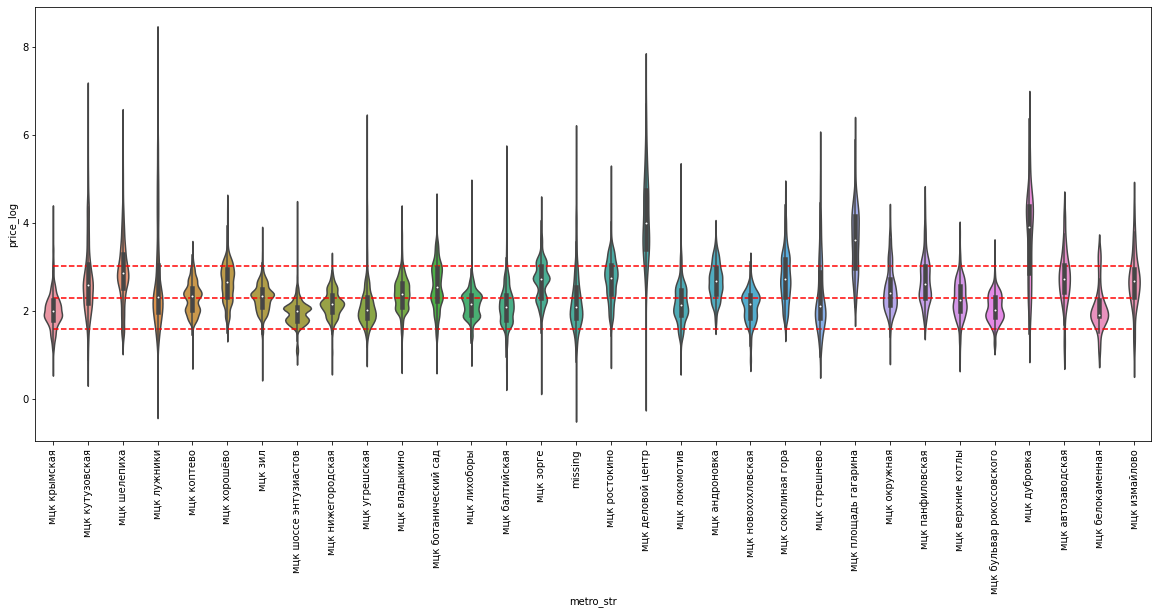

In [42]:
plt.figure(figsize=(20,8))
column = 'metro_str'
order_median = train.groupby([column])['price'].median().sort_values(ascending=False).index
order_size = train.groupby([column]).size().sort_values(ascending=False).index
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
plt.xticks(rotation=90)
sns.violinplot(x=column, y='price_log', data=train, order=order_size);

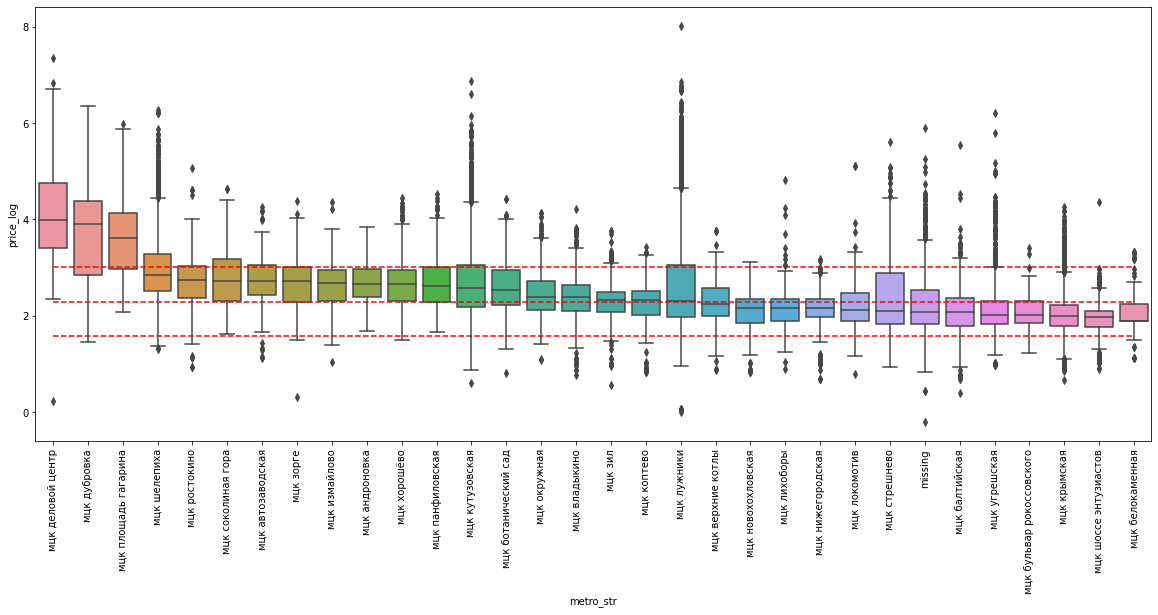

In [43]:
plt.figure(figsize=(20,8))
plt.hlines(reference, 0, len(train[column].value_counts())-1, colors='r', linestyles='--')
plt.xticks(rotation=90)
sns.boxplot(x=column, y='price_log', data=train, order=order_median);

In [56]:
def station_func(row):
    station = [i for i in row['bread_geo_str'].split(',') if ('м ' in i)]
    if len(station)>0 :
        return ','.join(station)
    return 'missing'
train['station_str'] = train[['bread_geo_str']].apply(station_func, axis=1)

In [47]:
train['station_str'].value_counts()

missing                   20086
м бунинская аллея          1751
м выхино                   1207
м октябрьское поле         1152
м ховрино                  1098
                          ...  
м театральная                 2
м кузнецкий мост              1
м битцевский парк             1
м библиотека им ленина        1
м хорошёвская                 1
Name: station_str, Length: 200, dtype: int64

In [57]:
def street_func(row):
    street_ext = ['ул ', 'б-р', 'пер ', 'пр-кт', 'аллея ', 'проезд ', 'ш ', 'пл ', 'наб ']
    street = [i for i in row['bread_geo_str'].split(',') if any(ext in i for ext in street_ext)]
    if len(street)>0 :
        return ','.join(street)
    return 'missing'
train['street_str'] = train[['bread_geo_str']].apply(street_func, axis=1)

In [52]:
col = ['Construction phase:', 'Housing class:', 'street_str']
subset = train['Housing class:']!='Elite class'
train.groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

Construction phase: Housing class:              street_str       price  \
                                                                      amin   
184              Finish    Elite class             пер хлебный   64.500000   
130        Commissioned    Elite class        пер коробейников    1.010000   
126        Commissioned    Elite class         пер бутиковский  276.000000   
132        Commissioned    Elite class            пер курсовой  203.650000   
125        Commissioned    Elite class        пер богословский    1.260000   
..                  ...            ...                     ...         ...   
594                 nan            nan  ул новокузьминская 1-я    2.650000   
630                 nan            nan             ул поречная    2.550000   
584                 nan            nan          ул никитинская    2.400000   
519                 nan            nan     ул крылатские холмы    0.820018   
424                 nan            nan          ул вильнюсская    2.300000   

                                           
           mean      median    amax count  
184  350.258571  415.620000  617.46     7  
130  270.030357  296.625000  842.42    28  
126  276.000000  276.000000  276.00     1  
132  315.838889  273.510000  520.84     9  
125  309.798000  267.395000  915.80    30  
..          ...         ...     ...   ...  
594    2.650000    2.650000    2.65     1  
630    2.550000    2.550000    2.55     1  
584    2.400000    2.400000    2.40     1  
519    8.045496    2.367222   18.00     5  
424    2.300000    2.300000    2.30     1  

[753 rows x 8 columns]

In [58]:
col = ['Construction phase:', 'Housing class:', 'street_str']
subset = train['Housing class:']!='Elite class'
train.groupby(col)[['price']].\
agg([ np.min, np.mean, np.median, np.max, 'count']).reset_index().sort_values(('price', 'median'), ascending=False)

col = ['Building type:', 'Construction phase:', 'Housing class:']
# subset = train['Housing class:']=='Elite class'
df_group = train.groupby(col)[['price']].agg([np.median]).reset_index().sort_values(('price', 'median'), ascending=False)
df_group = df_group[df_group[('price', 'median')] > np.percentile(train['price'], 95)]
array_values = df_group[col].values

def grouped(row):
    for x in array_values:
        if np.array_equal(x, row.values):
            return 1
    return 0
df_all['build_constr_house'] = df_all[col].apply(grouped, axis=1)

Construction phase:  Housing class:        street_str      price  \
                                                                amin   
184              Finish     Elite class       пер хлебный   64.50000   
130        Commissioned     Elite class  пер коробейников    1.01000   
126        Commissioned     Elite class   пер бутиковский  276.00000   
132        Commissioned     Elite class      пер курсовой  203.65000   
125        Commissioned     Elite class  пер богословский    1.26000   
..                  ...             ...               ...        ...   
107        Commissioned   Economy class      ул городская    4.60000   
171              Finish  Business class       ул пришвина    4.30000   
180              Finish   Economy class      ул боровская    3.30000   
181              Finish   Economy class    ул мостотреста    3.24597   
112        Commissioned   Economy class     ул недорубова    2.99000   

                                             
           mean     median       amax count  
184  350.258571  415.62000  617.46000     7  
130  270.030357  296.62500  842.42000    28  
126  276.000000  276.00000  276.00000     1  
132  315.838889  273.51000  520.84000     9  
125  309.798000  267.39500  915.80000    30  
..          ...        ...        ...   ...  
107    4.600000    4.60000    4.60000     1  
171    4.300000    4.30000    4.30000     1  
180    3.300000    3.30000    3.30000     1  
181    3.245970    3.24597    3.24597     1  
112    3.019500    3.01950    3.04900     2  

[222 rows x 8 columns]

In [ ]:
df = df_all.iloc[:, 5:12]
missing = df[df['Building type:'].isna()]
missing.describe()

,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:
count,9,0,243,243,215,3,3
unique,2,0,3,3,1,1,1
top,Yes,NaN,flat,secondary,no fee,Finish,Comfort class
freq,6,NaN,238,135,215,3,3


In [ ]:
cond = df_all['Building type:'].isna()
df_all[cond].head(15)

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,...,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:,id
75,"[Москва, Новая Москва, п. Первомайское, п. Пти...","[3 апреля, 33, Обновлено 6 мая]","[Новая Москва, п. Первомайское, п. Птичное, ул...",[sfn-9151912909@yandex.ru],4.1000,NaN,NaN,flat,secondary,no fee,NaN,NaN,NaN,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,"[Москва, Новая Москва, п. Киевский, рп. Киевский]","[7 декабря 2018, 106, (+1 за сегодня), Обновле...","[Новая Москва, п. Киевский, рп Киевский, Новая...",[Инвест недвижимость],5.4000,NaN,NaN,flat,secondary,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,"[Москва, г. Зеленоград, аллея. Яблоневая]","[23 января 2017, 1030, (+1 за сегодня), Обновл...","[г. Зеленоград, аллея Яблоневая, г. Зеленоград...",[Елена],6.3000,NaN,NaN,flat,secondary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,"[Москва, Новая Москва, п. Воскресенское, СП Во...","[14 марта, 28, (+1 за сегодня), Обновлено 13 мая]","[Новая Москва, п. Воскресенское, г. Москва, СП...",[pil-m@mail.ru],6.1000,NaN,NaN,flat,secondary,NaN,NaN,NaN,NaN,combined,loggia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,separate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,"[Москва, г. Зеленоград, МЦК Балтийская]","[16 мая, 7, (+1 за сегодня)]","[г. Зеленоград, г. Зеленоград]",[],6.6800,NaN,NaN,flat,secondary,no fee,NaN,NaN,NaN,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,"[Москва, Таганский, м. Таганская, МЦК Дубровка]","[15 марта, 14, (+1 за сегодня), Обновлено 13 мая]","[г. Москва, Таганский, г. Москва, Таганский]",[],246.9000,NaN,NaN,flat,new building,no fee,NaN,NaN,NaN,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1439,"[Москва, г. Зеленоград, пл. Юности]","[вчера в 14:51, 6]","[г. Зеленоград, пл Юности, г. Зеленоград, пл Ю...",[a9015173819@yandex.ru],4.5795,NaN,NaN,flat,secondary,no fee,NaN,NaN,NaN,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1596,"[Москва, Пресненский, м. Международная, МЦК Ше...","[16 мая, 13, (+7 за сегодня)]","[г. Москва, Пресненский, г. Москва, Пресненский]",[],8.5000,NaN,NaN,flat,secondary,no fee,NaN,NaN,yes,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1820,"[Москва, Новая Москва, г. Троицк]","[25 апреля, 51, (+1 за сегодня)]","[Новая Москва, г. Троицк, Новая Москва, г. Тро...",[Агенство Сфера Недвижимости],3.3000,NaN,NaN,flat,secondary,no fee,NaN,NaN,NaN,combined,balcony,NaN,yard,...,NaN,NaN,NaN,NaN,NaN,laminate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,"[Москва, ул. Островитянова]","[4 апреля, 20, Обновлено 16 мая]","[г. Москва, ул Островитянова, г. Москва, ул Ос...",[sfn-9151912909@yandex.ru],12.7000,NaN,NaN,flat,secondary,no fee,NaN,NaN,yes,separate,loggia,yes,yard,...,NaN,yes,NaN,NaN,NaN,laminate,separate,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
